# Classification Model
This is the second phase of the experiment that involves building a machine learning pipeline using Support Vector Machine and Random Forest. I am going to use the K-means algorithm because the results were fascinating from a business point of view. All of the clusters in the K-means were evenly distributed, providing a strong understanding of the football players.

DBSCAN results were not even dispersed; over 90% of the football players were concentrated in a single cluster. This would not contribute to the model's core functionality.

In [8]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

In [9]:
from sklearn.preprocessing import scale
from sklearn import preprocessing
import itertools
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import EditedNearestNeighbours 
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [11]:
data=pd.read_csv("data.csv")
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Examine the size of the dataset to ensure that no changes occurred

In [12]:
data.shape

(18207, 89)

### Check for NaN (Not a Number)

In [13]:
data.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

### To remove columns that will not be used in the model, I need replace the column identifier ignoring spaces

In [14]:
data.columns = [c.replace(' ', '') for c in data.columns]
data.columns

Index(['Unnamed:0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'ClubLogo', 'Value', 'Wage', 'Special',
       'PreferredFoot', 'InternationalReputation', 'WeakFoot', 'SkillMoves',
       'WorkRate', 'BodyType', 'RealFace', 'Position', 'JerseyNumber',
       'Joined', 'LoanedFrom', 'ContractValidUntil', 'Height', 'Weight', 'LS',
       'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM',
       'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDi

### Drop any column that aren't necessary for the model

In [15]:
data=data.drop(['Name','Unnamed:0','ID','Photo','Flag','Overall','ClubLogo', 'Special', 'InternationalReputation', 'WeakFoot',
               'SkillMoves','WorkRate','BodyType','RealFace','JerseyNumber','Joined','LoanedFrom','ContractValidUntil',
                'Weight','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy',
                'LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping',
                'Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure',
                'Marking','SlidingTackle','StandingTackle','ReleaseClause'], axis=1)

data.head(10)

,Age,Nationality,Potential,Club,Value,Wage,PreferredFoot,Position,Height,LS,...,LB,LCB,CB,RCB,RB,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,FC Barcelona,€110.5M,€565K,Left,RF,5'7,88.0,...,59.0,47.0,47.0,47.0,59.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,Juventus,€77M,€405K,Right,ST,6'2,91.0,...,61.0,53.0,53.0,53.0,61.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,93,Paris Saint-Germain,€118.5M,€290K,Right,LW,5'9,84.0,...,60.0,47.0,47.0,47.0,60.0,9.0,9.0,15.0,15.0,11.0
3,27,Spain,93,Manchester United,€72M,€260K,Right,GK,6'4,NaN,...,NaN,NaN,NaN,NaN,NaN,90.0,85.0,87.0,88.0,94.0
4,27,Belgium,92,Manchester City,€102M,€355K,Right,RCM,5'11,82.0,...,73.0,66.0,66.0,66.0,73.0,15.0,13.0,5.0,10.0,13.0
5,27,Belgium,91,Chelsea,€93M,€340K,Right,LF,5'8,83.0,...,60.0,49.0,49.0,49.0,60.0,11.0,12.0,6.0,8.0,8.0
6,32,Croatia,91,Real Madrid,€67M,€420K,Right,RCM,5'8,77.0,...,79.0,71.0,71.0,71.0,79.0,13.0,9.0,7.0,14.0,9.0
7,31,Uruguay,91,FC Barcelona,€80M,€455K,Right,RS,6'0,87.0,...,66.0,63.0,63.0,63.0,66.0,27.0,25.0,31.0,33.0,37.0
8,32,Spain,91,Real Madrid,€51M,€380K,Right,RCB,6'0,73.0,...,84.0,87.0,87.0,87.0,84.0,11.0,8.0,9.0,7.0,11.0
9,25,Slovenia,93,Atlético Madrid,€68M,€94K,Right,GK,6'2,NaN,...,NaN,NaN,NaN,NaN,NaN,86.0,92.0,78.0,88.0,89.0


### Fill up the empty rows (NaN) with the dataset's mean value


In [16]:
column_means = data.mean()
data = data.fillna(column_means)
data

,Age,Nationality,Potential,Club,Value,Wage,PreferredFoot,Position,Height,LS,...,LB,LCB,CB,RCB,RB,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,FC Barcelona,€110.5M,€565K,Left,RF,5'7,88.00000,...,59.000000,47.000000,47.000000,47.000000,59.000000,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,Juventus,€77M,€405K,Right,ST,6'2,91.00000,...,61.000000,53.000000,53.000000,53.000000,61.000000,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,93,Paris Saint-Germain,€118.5M,€290K,Right,LW,5'9,84.00000,...,60.000000,47.000000,47.000000,47.000000,60.000000,9.0,9.0,15.0,15.0,11.0
3,27,Spain,93,Manchester United,€72M,€260K,Right,GK,6'4,57.81547,...,56.806786,55.614626,55.614626,55.614626,56.806786,90.0,85.0,87.0,88.0,94.0
4,27,Belgium,92,Manchester City,€102M,€355K,Right,RCM,5'11,82.00000,...,73.000000,66.000000,66.000000,66.000000,73.000000,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,England,65,Crewe Alexandra,€60K,€1K,Right,CM,5'9,42.00000,...,45.000000,45.000000,45.000000,45.000000,45.000000,10.0,13.0,7.0,8.0,9.0
18203,19,Sweden,63,Trelleborgs FF,€60K,€1K,Right,ST,6'3,45.00000,...,29.000000,32.000000,32.000000,32.000000,29.000000,10.0,9.0,9.0,5.0,12.0
18204,16,England,67,Cambridge United,€60K,€1K,Right,ST,5'8,45.00000,...,33.000000,28.000000,28.000000,28.000000,33.000000,6.0,5.0,10.0,6.0,13.0
18205,17,England,66,Tranmere Rovers,€60K,€1K,Right,RW,5'10,47.00000,...,35.000000,31.000000,31.000000,31.000000,35.000000,14.0,6.0,14.0,8.0,9.0


### Remove the Pounds symbol and letters from the players' wages and values

In [17]:
data.Wage = data.Wage.str.replace("€","")
data.Wage = data.Wage.str.replace("K","").astype("float")
data.Wage.head() 

0    565.0
1    405.0
2    290.0
3    260.0
4    355.0
Name: Wage, dtype: float64

In [ ]:
data.Value = data.Value.str.replace("€","")
data.Value = data.Value.str.replace("M","")
data.Value = data.Value.str.replace("K","").astype("float")
data.Value.head() 

### One-hot encoding
This is used to convert all categorical variable into indicator variable i.e., (0's and 1's)

In [18]:
dummies=pd.get_dummies(data)
dummies

,Age,Potential,Wage,LS,ST,RS,LW,LF,CF,RF,...,Height_6'0,Height_6'1,Height_6'2,Height_6'3,Height_6'4,Height_6'5,Height_6'6,Height_6'7,Height_6'8,Height_6'9
0,31,94,565.0,88.00000,88.00000,88.00000,92.00000,93.00000,93.00000,93.00000,...,0,0,0,0,0,0,0,0,0,0
1,33,94,405.0,91.00000,91.00000,91.00000,89.00000,90.00000,90.00000,90.00000,...,0,0,1,0,0,0,0,0,0,0
2,26,93,290.0,84.00000,84.00000,84.00000,89.00000,89.00000,89.00000,89.00000,...,0,0,0,0,0,0,0,0,0,0
3,27,93,260.0,57.81547,57.81547,57.81547,59.03765,58.71939,58.71939,58.71939,...,0,0,0,0,1,0,0,0,0,0
4,27,92,355.0,82.00000,82.00000,82.00000,87.00000,87.00000,87.00000,87.00000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,65,1.0,42.00000,42.00000,42.00000,44.00000,44.00000,44.00000,44.00000,...,0,0,0,0,0,0,0,0,0,0
18203,19,63,1.0,45.00000,45.00000,45.00000,39.00000,42.00000,42.00000,42.00000,...,0,0,0,1,0,0,0,0,0,0
18204,16,67,1.0,45.00000,45.00000,45.00000,45.00000,46.00000,46.00000,46.00000,...,0,0,0,0,0,0,0,0,0,0
18205,17,66,1.0,47.00000,47.00000,47.00000,47.00000,46.00000,46.00000,46.00000,...,0,0,0,0,0,0,0,0,0,0


### Store the dummy method into variable X

In [19]:
X=dummies
X

,Age,Potential,Wage,LS,ST,RS,LW,LF,CF,RF,...,Height_6'0,Height_6'1,Height_6'2,Height_6'3,Height_6'4,Height_6'5,Height_6'6,Height_6'7,Height_6'8,Height_6'9
0,31,94,565.0,88.00000,88.00000,88.00000,92.00000,93.00000,93.00000,93.00000,...,0,0,0,0,0,0,0,0,0,0
1,33,94,405.0,91.00000,91.00000,91.00000,89.00000,90.00000,90.00000,90.00000,...,0,0,1,0,0,0,0,0,0,0
2,26,93,290.0,84.00000,84.00000,84.00000,89.00000,89.00000,89.00000,89.00000,...,0,0,0,0,0,0,0,0,0,0
3,27,93,260.0,57.81547,57.81547,57.81547,59.03765,58.71939,58.71939,58.71939,...,0,0,0,0,1,0,0,0,0,0
4,27,92,355.0,82.00000,82.00000,82.00000,87.00000,87.00000,87.00000,87.00000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,65,1.0,42.00000,42.00000,42.00000,44.00000,44.00000,44.00000,44.00000,...,0,0,0,0,0,0,0,0,0,0
18203,19,63,1.0,45.00000,45.00000,45.00000,39.00000,42.00000,42.00000,42.00000,...,0,0,0,1,0,0,0,0,0,0
18204,16,67,1.0,45.00000,45.00000,45.00000,45.00000,46.00000,46.00000,46.00000,...,0,0,0,0,0,0,0,0,0,0
18205,17,66,1.0,47.00000,47.00000,47.00000,47.00000,46.00000,46.00000,46.00000,...,0,0,0,0,0,0,0,0,0,0


### Normalize the dataset

In [20]:
players_scale = preprocessing.StandardScaler().fit(X).transform(X)
players_scale[0:5]

array([[ 1.25867833e+00,  3.69809177e+00,  2.52409931e+01, ...,
        -3.39813833e-02, -2.34422937e-02, -1.04814087e-02],
       [ 1.68696087e+00,  3.69809177e+00,  1.79678315e+01, ...,
        -3.39813833e-02, -2.34422937e-02, -1.04814087e-02],
       [ 1.87971976e-01,  3.53512784e+00,  1.27402466e+01, ...,
        -3.39813833e-02, -2.34422937e-02, -1.04814087e-02],
       [ 4.02113246e-01,  3.53512784e+00,  1.13765288e+01, ...,
        -3.39813833e-02, -2.34422937e-02, -1.04814087e-02],
       [ 4.02113246e-01,  3.37216390e+00,  1.56949685e+01, ...,
        -3.39813833e-02, -2.34422937e-02, -1.04814087e-02]])

In [21]:
df_players = pd.DataFrame(players_scale, columns=X.columns)
df_players.head()

,Age,Potential,Wage,LS,ST,RS,LW,LF,CF,RF,...,Height_6'0,Height_6'1,Height_6'2,Height_6'3,Height_6'4,Height_6'5,Height_6'6,Height_6'7,Height_6'8,Height_6'9
0,1.258678,3.698092,25.240993,3.521791e+00,3.521791e+00,3.521791e+00,3.552838,3.709879,3.709879,3.709879,...,-0.433568,-0.342144,-0.352766,-0.239794,-0.207130,-0.117031,-0.071653,-0.033981,-0.023442,-0.010481
1,1.686961,3.698092,17.967832,3.871817e+00,3.871817e+00,3.871817e+00,3.229484,3.385216,3.385216,3.385216,...,-0.433568,-0.342144,2.834737,-0.239794,-0.207130,-0.117031,-0.071653,-0.033981,-0.023442,-0.010481
2,0.187972,3.535128,12.740247,3.055089e+00,3.055089e+00,3.055089e+00,3.229484,3.276995,3.276995,3.276995,...,-0.433568,-0.342144,-0.352766,-0.239794,-0.207130,-0.117031,-0.071653,-0.033981,-0.023442,-0.010481
3,0.402113,3.535128,11.376529,8.290282e-16,8.290282e-16,8.290282e-16,0.000000,0.000000,0.000000,0.000000,...,-0.433568,-0.342144,-0.352766,-0.239794,4.827879,-0.117031,-0.071653,-0.033981,-0.023442,-0.010481
4,0.402113,3.372164,15.694969,2.821739e+00,2.821739e+00,2.821739e+00,3.013914,3.060553,3.060553,3.060553,...,-0.433568,-0.342144,-0.352766,-0.239794,-0.207130,-0.117031,-0.071653,-0.033981,-0.023442,-0.010481


### Applying K-means++ to PCA principal components

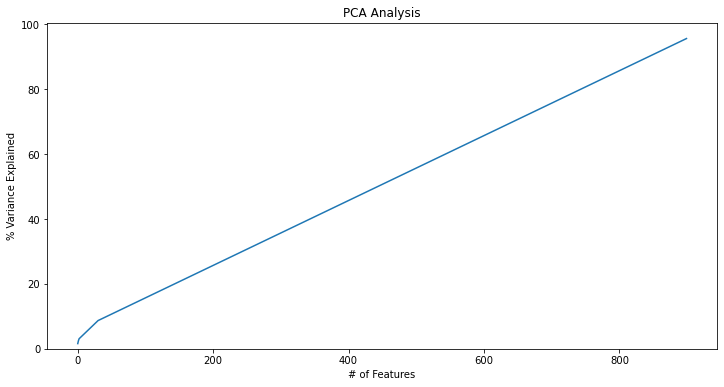

In [22]:
#n_components=900 because we have 900 features in the dataset
pca = PCA(n_components=900)
pca.fit(df_players)
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)

### Examine the n components with a value of 3 given that it produced the best silhouette score previously.

In [23]:
pca = PCA(n_components=3)
pca_scale = pca.fit_transform(df_players)
pca_df_scale = pd.DataFrame(pca_scale,  columns=['pc1','pc2','pc3'])
print(pca.explained_variance_ratio_)

[0.0163056  0.00895892 0.00564119]


### Applying silhouette coefficient (using the elbow method)

Text(0, 0.5, 'Inertia')

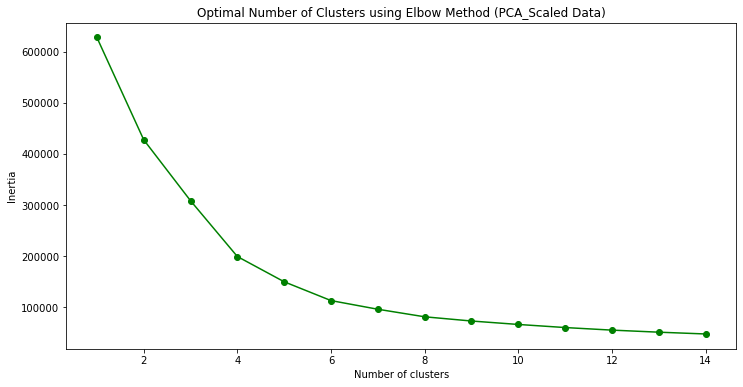

In [24]:
sse = []
k_list = range(1, 15)

for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(pca_df_scale)
    sse.append([k, km.inertia_])
    
pca_results = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o', color='green')
plt.title('Optimal Number of Clusters using Elbow Method (PCA_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

### Applying K-means++ to PCA and finding out the optimal number of clusters
Recall that PCA component of 3 gave us the best silhouette score

In [25]:
kmeans_pca_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(pca_df_scale)

print('KMeans PCA Scaled Silhouette Score: {}'.format(silhouette_score(pca_df_scale, kmeans_pca_scale.labels_, metric='euclidean')))
labels_pca_scale = kmeans_pca_scale.labels_
clusters_pca_scale = pd.concat([pca_df_scale, 
                                pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)

KMeans PCA Scaled Silhouette Score: 0.45489330392646476


### Execute the K-means++ model

In [26]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(pca_df_scale)
labels = k_means.labels_
print(labels)

[2 2 2 ... 0 0 1]


### Create a new column for the clustered labels

In [27]:
df_players["Clusters"] = labels
df_players.head(20)

,Age,Potential,Wage,LS,ST,RS,LW,LF,CF,RF,...,Height_6'1,Height_6'2,Height_6'3,Height_6'4,Height_6'5,Height_6'6,Height_6'7,Height_6'8,Height_6'9,Clusters
0,1.258678,3.698092,25.240993,3.521791e+00,3.521791e+00,3.521791e+00,3.552838,3.709879,3.709879,3.709879,...,-0.342144,-0.352766,-0.239794,-0.207130,-0.117031,-0.071653,-0.033981,-0.023442,-0.010481,2
1,1.686961,3.698092,17.967832,3.871817e+00,3.871817e+00,3.871817e+00,3.229484,3.385216,3.385216,3.385216,...,-0.342144,2.834737,-0.239794,-0.207130,-0.117031,-0.071653,-0.033981,-0.023442,-0.010481,2
2,0.187972,3.535128,12.740247,3.055089e+00,3.055089e+00,3.055089e+00,3.229484,3.276995,3.276995,3.276995,...,-0.342144,-0.352766,-0.239794,-0.207130,-0.117031,-0.071653,-0.033981,-0.023442,-0.010481,2
3,0.402113,3.535128,11.376529,8.290282e-16,8.290282e-16,8.290282e-16,0.000000,0.000000,0.000000,0.000000,...,-0.342144,-0.352766,-0.239794,4.827879,-0.117031,-0.071653,-0.033981,-0.023442,-0.010481,3
4,0.402113,3.372164,15.694969,2.821739e+00,2.821739e+00,2.821739e+00,3.013914,3.060553,3.060553,3.060553,...,-0.342144,-0.352766,-0.239794,-0.207130,-0.117031,-0.071653,-0.033981,-0.023442,-0.010481,2
5,0.402113,3.209200,15.013110,2.938414e+00,2.938414e+00,2.938414e+00,3.229484,3.168774,3.168774,3.168774,...,-0.342144,-0.352766,-0.239794,-0.207130,-0.117031,-0.071653,-0.033981,-0.023442,-0.010481,2
6,1.472820,3.209200,18.649690,2.238362e+00,2.238362e+00,2.238362e+00,2.798345,2.735891,2.735891,2.735891,...,-0.342144,-0.352766,-0.239794,-0.207130,-0.117031,-0.071653,-0.033981,-0.023442,-0.010481,2
7,1.258678,3.209200,20.240694,3.405115e+00,3.405115e+00,3.405115e+00,2.906130,3.060553,3.060553,3.060553,...,-0.342144,-0.352766,-0.239794,-0.207130,-0.117031,-0.071653,-0.033981,-0.023442,-0.010481,2
8,1.472820,3.209200,16.831400,1.771660e+00,1.771660e+00,1.771660e+00,1.181574,1.329019,1.329019,1.329019,...,-0.342144,-0.352766,-0.239794,-0.207130,-0.117031,-0.071653,-0.033981,-0.023442,-0.010481,2
9,-0.026169,3.535128,3.830624,8.290282e-16,8.290282e-16,8.290282e-16,0.000000,0.000000,0.000000,0.000000,...,-0.342144,2.834737,-0.239794,-0.207130,-0.117031,-0.071653,-0.033981,-0.023442,-0.010481,3


### Examine the size of the dataset

In [28]:
df_players.shape

(18207, 1117)

### Separate the data into features (X) and targets (clusters (y)).

In [29]:
X = df_players.drop('Clusters', axis=1)
y = df_players['Clusters']

### Over-sampling and under-sampling on unbalanced data

0.7.0
Class=0, n=1230 (20.517%)
Class=1, n=1185 (19.766%)
Class=2, n=1553 (25.905%)
Class=3, n=2027 (33.812%)


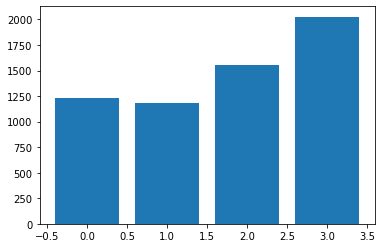

In [30]:
print(imblearn.__version__)

oversample = SMOTE()
enn = EditedNearestNeighbours()
# label encode the target variable

y = LabelEncoder().fit_transform(y)

X, y = enn.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100

    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
#plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

### Train Test Split divides the dataset into 70 percent for training and 30 percent for testing.

In [31]:
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=50)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (4196, 1116) (4196,)
Test set: (1799, 1116) (1799,)


### Insights on the clustering pattern

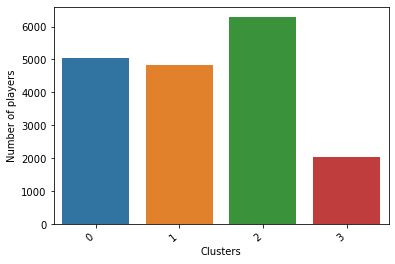

<Figure size 5760x2880 with 0 Axes>

In [32]:
ax = sns.countplot(x = df_players['Clusters'])
plt.figure(figsize=(80, 40))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Clusters') 
ax.set_ylabel('Number of players')
plt.tight_layout()
#plt.title("Visualization of players based on their position")
plt.show()

### Support Vector Machine
To build this model, I have used the Support Vector Machine Classifier

In [33]:
clf = SVC()

### Grid search cross validation hyperparameter tuning will be used to improve our model's performance accuracy.

In [34]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=  12.6s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=  12.9s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=  12.6s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=  12.2s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=  12.7s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=  12.1s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=  11.6s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=  12.2s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=  11.6s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=  11.4s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=  11.8s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=  12.9s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=  12.1s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=  12.3s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=  12.9s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=  11.7s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=  11.5s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=  11.6s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=  12.2s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=  11.6s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=  11.6s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=  11.5s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=  12.6s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

### This will produce the best parameters, estimator, and score for the SVM classifier

In [35]:
print('Best parameter:',grid.best_params_)
print('Grid best estimator:',grid.best_estimator_)
print('Best score:',grid.best_score_)

Best parameter: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
Grid best estimator: SVC(C=1, gamma=0.0001)
Best score: 0.9954722174924797


### Will now, apply the above-mentioned parameters for the SVM classifier

In [36]:
clf = SVC(C=1, gamma=0.0001, kernel= 'rbf')
clf.fit(x_train, y_train) 

SVC(C=1, gamma=0.0001)

### Will apply the predict method to the test set

In [37]:
y_pred = clf.predict(x_test)

### I used cross validation to further analyze the model's performance on its test set

In [38]:
print(classification_report(y_test, y_pred))

print('Accuracy of SVM classifier on the training set: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of SVM classifier on the test set: {:.2f}'.format(clf.score(x_test, y_test)))

#Decision Trees are very prone to overfitting as shown in the scores

score = cross_val_score(clf, x_train, y_train, cv=10) 
print('Cross-validation score: ',score)
print('Cross-validation mean score: ',score.mean())

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       366
           1       1.00      0.98      0.99       362
           2       0.98      1.00      0.99       460
           3       1.00      1.00      1.00       611

    accuracy                           0.99      1799
   macro avg       0.99      0.99      0.99      1799
weighted avg       0.99      0.99      0.99      1799

Accuracy of SVM classifier on the training set: 1.00
Accuracy of SVM classifier on the test set: 0.99
Cross-validation score:  [0.99285714 0.99761905 0.99047619 1.         0.99285714 0.99047619
 0.99761337 1.         0.99522673 1.        ]
Cross-validation mean score:  0.9957125809751108


### Summarize the model's performance using different classification metrics

In [39]:
def summarize_classification(y_test,y_pred,avg_method='weighted'):
    acc = accuracy_score(y_test, y_pred,normalize=True)
    num_acc = accuracy_score(y_test, y_pred,normalize=False)
    f1= f1_score(y_test, y_pred, average=avg_method)
    prec = precision_score(y_test, y_pred, average=avg_method)
    recall = recall_score(y_test, y_pred, average=avg_method)
    jaccard = jaccard_score(y_test, y_pred, average=avg_method)
    
    print("Length of testing data: ", len(y_test))
    print("accuracy_count : " , num_acc)
    print("accuracy_score : " , acc)
    print("f1_score : " , f1)
    print("precision_score : " , prec)
    print("recall_score : ", recall)
    print("jaccard_score : ", jaccard)
    
summarize_classification(y_test, y_pred)

Length of testing data:  1799
accuracy_count :  1787
accuracy_score :  0.9933296275708727
f1_score :  0.9933397555453205
precision_score :  0.9934136787037705
recall_score :  0.9933296275708727
jaccard_score :  0.9867946680073628


### To further evaluate our performance findings, let's build a confusion matrix that describes the false positive, true negative, true positive, and false negative

In [40]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       366
           1       1.00      0.98      0.99       362
           2       0.98      1.00      0.99       460
           3       1.00      1.00      1.00       611

    accuracy                           0.99      1799
   macro avg       0.99      0.99      0.99      1799
weighted avg       0.99      0.99      0.99      1799

Confusion matrix, without normalization
[[365   0]
 [  0 356]]


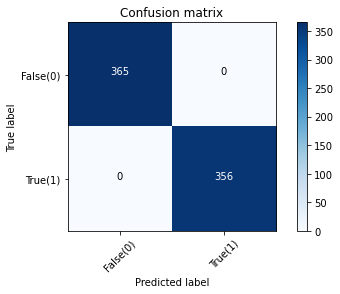

In [41]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['False(0)','True(1)'],normalize= False,  title='Confusion matrix')

### Summary of the confusion matrix
Looking at the first row. The first row contains players whose false value in the test set is (0). As you can see, 365 of the 712 players have a false value of (0). And, of these 365, the classifier accurately predicted 365 as (0), and 0 as (1) (True value) for the predicted labels.

This indicates that in the test set, the actual false value for 365 players was (0), and the classifier accurately predicted those as (0) (True label). However, while the actual label of 1 player was 0 (False value), the classifier predicted those as 0, which means it did excellently well. We may think of it as a model excellence for the first row.

What about the players that have a true value of 1?

Looking at the second row. It appears that there are 356 players whose true value was 1. The classifier accurately identified 356 of them as 1 as a result. it has done an excellent job at predicting players with true value 1. The confusion matrix is useful since it demonstrates the model's ability to properly predict or separate the classes. In the case of a binary classifier, such as this one, these values can be interpreted as the number of true positives, false positives, true negatives, and false negatives.

### Comparison of the actual test set to the predicted labels

In [42]:
#Accuracy
pred_results = pd.DataFrame({'y_test': pd.Series(y_test),
                             'y_pred': pd.Series(y_pred)})

pred_results.sample(10)

,y_test,y_pred
1516,2,2
947,2,2
1168,1,1
942,1,1
870,2,2
1597,3,3
991,2,2
1039,3,3
20,0,0
12,3,3


# Random Forest

In [43]:
rf=RandomForestClassifier()
rf

RandomForestClassifier()

### Grid search cross validation hyperparameter tuning will be used to improve our model's performance accuracy

In [44]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [45]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [46]:
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

### This will reccommend the best parameters, estimator, and score for the Random Forest classifier

In [47]:
print('Best parameter:', grid_search.best_params_)
print('Best grid estimator:', grid_search.best_estimator_)
print('Best score', grid_search.best_score_)

Best parameter: {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
Best grid estimator: RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=200)
Best score 0.9304148198658938


### I applied the above-mentioned parameters for the Random Forest classifier

In [48]:
rf=RandomForestClassifier(bootstrap=True, max_depth=80, max_features=3, 
                          min_samples_leaf=3, min_samples_split=8,
                          n_estimators=200).fit(x_train,y_train)
rf

RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=200)

### I applied the predict method to the test set

In [49]:
y_pred = rf.predict(x_test)

### I used cross validation to further analyze the model's performance on its test set

In [50]:
print(classification_report(y_test, y_pred))

print('Accuracy of Random Forest classifier on the training set: {:.2f}'.format(rf.score(x_train, y_train)))
print('Accuracy of Random Forest classifier on the test set: {:.2f}'.format(rf.score(x_test, y_test)))

#Decision Trees are very prone to overfitting as shown in the scores

score = cross_val_score(rf, x_train, y_train, cv=5) 
print('Cross-validation score: ',score)
print('Cross-validation mean score: ',score.mean())

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       366
           1       0.99      0.96      0.98       362
           2       0.92      1.00      0.96       460
           3       0.97      1.00      0.98       611

    accuracy                           0.97      1799
   macro avg       0.97      0.96      0.96      1799
weighted avg       0.97      0.97      0.97      1799

Accuracy of Random Forest classifier on the training set: 0.97
Accuracy of Random Forest classifier on the test set: 0.97
Cross-validation score:  [0.86 0.76 0.82 0.8  0.78]
Cross-validation mean score:  0.8036091719166809


### Summarize the model's performance using different classification metrics

In [51]:
def summarize_classification(y_test,y_pred,avg_method='weighted'):
    acc = accuracy_score(y_test, y_pred,normalize=True)
    num_acc = accuracy_score(y_test, y_pred,normalize=False)
    f1= f1_score(y_test, y_pred, average=avg_method)
    prec = precision_score(y_test, y_pred, average=avg_method)
    recall = recall_score(y_test, y_pred, average=avg_method)
    jaccard = jaccard_score(y_test, y_pred, average=avg_method)
    
    print("Length of testing data: ", len(y_test))
    print("accuracy_count : " , num_acc)
    print("accuracy_score : " , acc)
    print("f1_score : " , f1)
    print("precision_score : " , prec)
    print("recall_score : ", recall)
    print("jaccard_score : ", jaccard)
    
summarize_classification(y_test, y_pred)

Length of testing data:  1799
accuracy_count :  1737
accuracy_score :  0.9655364091161757
f1_score :  0.9651930669060474
precision_score :  0.9672670277305854
recall_score :  0.9655364091161757
jaccard_score :  0.933380205677719


### Comparison of the actual test set to the predicted labels

In [52]:
#Accuracy
pred_results = pd.DataFrame({'y_test': pd.Series(y_test),
                             'y_pred': pd.Series(y_pred)})

pred_results.sample(10)

,y_test,y_pred
294,2,2
1086,3,3
760,0,0
1504,0,0
981,3,3
1316,0,0
439,2,2
802,2,2
1363,3,3
108,3,3


### To further evaluate our performance findings, let's build a confusion matrix that describes the false positive, true negative, true positive, and false negative.

In [53]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       366
           1       0.99      0.96      0.98       362
           2       0.92      1.00      0.96       460
           3       0.97      1.00      0.98       611

    accuracy                           0.97      1799
   macro avg       0.97      0.96      0.96      1799
weighted avg       0.97      0.97      0.97      1799

Confusion matrix, without normalization
[[322   0]
 [  2 347]]


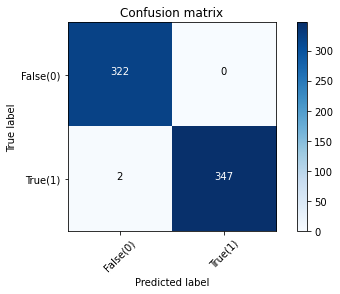

In [54]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['False(0)','True(1)'],normalize= False,  title='Confusion matrix')

### Summary of the confusion matrix
Looking at the first row. The first row contains players whose false value in the test set is (0). As you can see, 322 of the 671 players have a false value of (0). And, of these 322, the classifier accurately predicted 322 as (0), and 0 as (1) for the predicted label.

This indicates that in the test set, the actual false value for 322 players was (0), and the classifier accurately predicted those as (0). However, while the actual label of 0 players was 0 (false value), the classifier predicted those as 0, which means it did excellently well. We may think of it as a model excellence for the first row.

What about the players that have a true value of 1?

Looking at the second row. It appears that there are 347 players whose true value was 1. The classifier accurately identified 347 of them as 1, and 2 of them wrongly as 0 (false). As a result, it has done a good job at predicting players with true value 1.

### Final review of the results and evaluations
This provides an understanding of the business perspective related to our model. The clustering method (K-means) was able to categorise players according to their attributes. We may also conclude that the algorithm accurately identified the average, undervalued, and overperforming players. It also produced astounding results for the re-evaluation of the players, with 99 percent accuracy on the test set.

In [55]:
data["Clusters"] = labels
data.head(20)

,Age,Nationality,Potential,Club,Value,Wage,PreferredFoot,Position,Height,LS,...,LCB,CB,RCB,RB,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Clusters
0,31,Argentina,94,FC Barcelona,€110.5M,565.0,Left,RF,5'7,88.00000,...,47.000000,47.000000,47.000000,59.000000,6.0,11.0,15.0,14.0,8.0,2
1,33,Portugal,94,Juventus,€77M,405.0,Right,ST,6'2,91.00000,...,53.000000,53.000000,53.000000,61.000000,7.0,11.0,15.0,14.0,11.0,2
2,26,Brazil,93,Paris Saint-Germain,€118.5M,290.0,Right,LW,5'9,84.00000,...,47.000000,47.000000,47.000000,60.000000,9.0,9.0,15.0,15.0,11.0,2
3,27,Spain,93,Manchester United,€72M,260.0,Right,GK,6'4,57.81547,...,55.614626,55.614626,55.614626,56.806786,90.0,85.0,87.0,88.0,94.0,3
4,27,Belgium,92,Manchester City,€102M,355.0,Right,RCM,5'11,82.00000,...,66.000000,66.000000,66.000000,73.000000,15.0,13.0,5.0,10.0,13.0,2
5,27,Belgium,91,Chelsea,€93M,340.0,Right,LF,5'8,83.00000,...,49.000000,49.000000,49.000000,60.000000,11.0,12.0,6.0,8.0,8.0,2
6,32,Croatia,91,Real Madrid,€67M,420.0,Right,RCM,5'8,77.00000,...,71.000000,71.000000,71.000000,79.000000,13.0,9.0,7.0,14.0,9.0,2
7,31,Uruguay,91,FC Barcelona,€80M,455.0,Right,RS,6'0,87.00000,...,63.000000,63.000000,63.000000,66.000000,27.0,25.0,31.0,33.0,37.0,2
8,32,Spain,91,Real Madrid,€51M,380.0,Right,RCB,6'0,73.00000,...,87.000000,87.000000,87.000000,84.000000,11.0,8.0,9.0,7.0,11.0,2
9,25,Slovenia,93,Atlético Madrid,€68M,94.0,Right,GK,6'2,57.81547,...,55.614626,55.614626,55.614626,56.806786,86.0,92.0,78.0,88.0,89.0,3


### Model should be saved to file for adequate evaluation.

In [56]:
pd.DataFrame(data).to_csv('playerclusters.csv', index=False)

### Evaluation metric results

In [58]:
result=[{ 'Accuracy Score':'99%',
         'F1 Score': '99%',
         'Precision Score': '99%',
         'Recall Score': '99%',
         'Jaccard Score': '99%'},
        {'Accuracy Score':'96%',
         'F1 Score': '96%',
         'Precision Score': '96%',
         'Recall Score': '96%',
         'Jaccard Score': '93%'}]
df=pd.DataFrame(result, index=['Support Vector Machine','Random Forest'])
df.head()

,Accuracy Score,F1 Score,Precision Score,Recall Score,Jaccard Score
Support Vector Machine,99%,99%,99%,99%,99%
Random Forest,96%,96%,96%,96%,93%


# Conclusion
On the test set, the classification model generated excellent results. Because I have adequate data to train on, the model is not prone to overfitting. On the test set, Support Vector Machine and Random Forest achieve 98 and 99 percent accuracy, respectively. The f1 score and recall for all classes yielded 100 percent score for SVM classifier. This will address the manager's re-evaluation problem by predicting which category a given player’s skill set should belong. Managers can now determine if a player's release clause is genuinely worth the amount asked on the transfer market and which players should be rotated into other positions. This model has helped managers in diagnosing a lack of skill diversity and potentially influencing transfer decisions. Models now offers recommendation on players based on the manager's preferences.

K-means++ was the method adopted in this research. At first, one could have assumed that the poor performance was due to the dataset's susceptibility to noise, large dimensionality, or even the cluster shape. The use of PCA on K-means++ has resulted in a more equitable and business-friendly solution. The K-means++ algorithm was able to satisfy the requirements of this research by providing managers with insight on player's skill diversity problems such as underperforming, undervalue, average, overperforming among many others. The K-means++ method was successful in identifying possible groupings of players based of various attributes. Managers can now understand how the model works and make sound recommendations based on their preferences. The final phase of the project involves re-evaluating the players using a supervised machine learning technique. 

Having said that, I went ahead and used DBSCAN, a density clustering technique commonly employed on non-linear or non-spherical datasets. Two parameters are required: epsilon and minimum points. I also used PCA to reduce the number of dimensions to 3 principal components. I estimated an epsilon value of 0.2 and a minimum point value of 4 using the elbow method. I was able to attain 72 clusters, 1406 noise, and a silhouette score of -0.55 by using this parameter. Admittedly, the findings were unimpressive. To fine-tune the epsilon and minimum points values, I have used an iterative approach. I chose an epsilon value of 1.2 and a minimum points value of 2. The method produced 6 valid clusters, 5 noises, and a silhouette score of 0.46. However, when the generated clusters were plotted, it was observed that the first cluster contained 90% of the players. Similarly, from a business perspective, I would like that the clusters be more evenly distributed in order to give us with useful information about the players. Perhaps DBSCAN is not the best clustering technique for this dataset.

